In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv

from PIL import Image   
from tensorflow import keras  
import tensorflow.keras.layers as k

import warnings
warnings.filterwarnings("ignore")

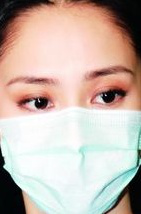

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
load_img(r"C:\Users\Admin\Desktop\J_notebook\CNN3\data\with_mask\with_mask_6.jpg")

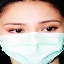

In [5]:
load_img(r"C:\Users\Admin\Desktop\J_notebook\CNN3\data\with_mask\with_mask_6.jpg", target_size = (64,64))

In [7]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(100)

In [9]:
image_dir = (r"C:\Users\Admin\Desktop\J_notebook\CNN3\data/")
size = 64
dataset = []
label = []

In [11]:
with_mask_img= os.listdir(image_dir + "with_mask/")

for i, img_name in enumerate(with_mask_img):
    if (img_name.split(".")[1] == "jpg"):    
        image = cv.imread(image_dir + "with_mask/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))   
        
        dataset.append(np.array(image))
        label.append(0)

In [15]:
without_mask_img= os.listdir(image_dir + "without_mask/")

for i, img_name in enumerate(without_mask_img):
    if (img_name.split(".")[1] == "jpg"):    
        image = cv.imread(image_dir + "without_mask/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))   
        
        dataset.append(np.array(image))
        label.append(1)

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2,random_state = 0)

In [39]:
INPUT_SHAPE = (size, size, 3)

inp = k.Input(shape = INPUT_SHAPE)

#Convolution(1)
conv1 = k.Conv2D(64, kernel_size = (3,3),activation = "relu", padding = "same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
# norm1 = k.BatchNormalization(axis = -1)(pool1)
# drop1 = k.Dropout(rate = 0.2)(norm1)

#Convolution(2)
conv2 = k.Conv2D(64, kernel_size = (3,3),activation = "relu", padding = "same")(pool1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
# norm2 = k.BatchNormalization(axis = -1)(pool2)
# drop2 = k.Dropout(rate = 0.2)(norm2)

#Convolution(3)
conv3 = k.Conv2D(32, kernel_size = (3,3),activation = "relu", padding = "same")(pool2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
# norm3 = k.BatchNormalization(axis = -1)(pool3)
# drop3 = k.Dropout(rate = 0.2)(norm3)

#Convolution(4)
#conv4 = k.Conv2D(32, kernel_size = (3,3),activation = "relu", padding = "same")(pool3)
#pool4 = k.MaxPool2D(pool_size = (2,2))(conv4)
# norm4 = k.BatchNormalization(axis = -1)(pool4)
# drop4 = k.Dropout(rate = 0.2)(norm4)

flat = k.Flatten()(pool3)

# # Hidden(1)
# hidden1 = k.Dense(512, activation="relu")(flat)
# norm5 = k.BatchNormalization(axis = -1)(hidden1)
# drop5 = k.Dropout(rate = 0.2)(norm5)

# # Hidden(2)
# hidden2 = k.Dense(512, activation="relu")(drop5)
# norm6 = k.BatchNormalization(axis = -1)(hidden2)
# drop6 = k.Dropout(rate = 0.2)(norm6)

# Hidden(3)
hidden3 = k.Dense(512, activation="relu")(flat)
# norm7 = k.BatchNormalization(axis = -1)(hidden3)
# drop7 = k.Dropout(rate = 0.2)(norm7)

# Hidden(4)
hidden4 = k.Dense(256, activation="relu")(hidden3)
# norm8 = k.BatchNormalization(axis = -1)(hidden4)
# drop8 = k.Dropout(rate = 0.2)(norm8)

out = k.Dense(2, activation = "softmax")(hidden4)

In [35]:
from keras.optimizers import Adam
adam = Adam(learning_rate = 0.0001)
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = "rmsprop",loss='categorical_crossentropy', metrics = ["accuracy"])

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,276,770 (4.87 MB)

 Trainable params: 1,276,770 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [37]:
history = model.fit(np.array(xtrain), ytrain, batch_size = 64, verbose = 1, epochs = 20, validation_split = 0.1, shuffle = False)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - accuracy: 0.6115 - loss: 29.2748 - val_accuracy: 0.6531 - val_loss: 2.8911
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - accuracy: 0.6417 - loss: 0.7519 - val_accuracy: 0.6531 - val_loss: 5.2613
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - accuracy: 0.6565 - loss: 0.7416 - val_accuracy: 0.6520 - val_loss: 3.4187
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 288ms/step - accuracy: 0.6557 - loss: 0.5941 - val_accuracy: 0.6509 - val_loss: 0.5642
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - accuracy: 0.6565 - loss: 0.5454 - val_accuracy: 0.6531 - val_loss: 0.7897
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - accuracy: 0.6568 - loss: 0.5252 - val_accuracy: 0.4951 - val_loss: 0.7432
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 289ms/step - accuracy: 0.6455 - loss: 0.5565 - val_accuracy: 0.6520 - val_loss: 0.6011
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - accuracy: 0.6586 - loss: 

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2, 1.0],
    fill_mode='nearest' ,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.5)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Admin\Desktop\J_notebook\CNN3\data/",
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Admin\Desktop\J_notebook\CNN3\data/",        
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
    
)

Found 6799 images belonging to 2 classes.
Found 3776 images belonging to 2 classes.


In [45]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    verbose=1,
    shuffle=False  # Shuffle is handled by the generator
)

Epoch 1/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 75s 175ms/step - accuracy: 0.6851 - loss: 0.5653 - val_accuracy: 0.8861 - val_loss: 0.2763
Epoch 2/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 74s 175ms/step - accuracy: 0.8330 - loss: 0.3913 - val_accuracy: 0.9322 - val_loss: 0.2057
Epoch 3/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 75s 176ms/step - accuracy: 0.8664 - loss: 0.3330 - val_accuracy: 0.9375 - val_loss: 0.1746
Epoch 4/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 74s 175ms/step - accuracy: 0.8813 - loss: 0.3095 - val_accuracy: 0.9293 - val_loss: 0.2144
Epoch 5/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 75s 176ms/step - accuracy: 0.8871 - loss: 0.2805 - val_accuracy: 0.9568 - val_loss: 0.1429
Epoch 6/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 75s 177ms/step - accuracy: 0.8918 - loss: 0.2742 - val_accuracy: 0.9478 - val_loss: 0.1462
Epoch 7/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 74s 175ms/step - accuracy: 0.9109 - loss: 0.2357 - val_accuracy: 0.9571 - val_loss: 0.1428
Epoch 8/15
425/425 ━━━━━━━━━━━━━━━━━━━━ 74s 175ms/step - accuracy: 0.9077 - loss: 0